In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation des données
# Convertion  dela variable Date au format datetime 

In [3]:
store_train = pd.read_csv('Store_train.csv')
store_train = store_train.drop("Unnamed: 0", axis = 1)
store_train.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem
370893,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,510,1,1,0,0,653505,2014,5,19,0
370894,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,437,1,0,0,0,762344,2014,5,17,5
370895,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,364,1,0,0,0,726976,2014,5,16,4
370896,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,343,1,0,0,0,815028,2014,5,15,3
370897,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,308,1,0,0,0,491898,2014,5,14,2


In [4]:
store_train.Promo.unique()

array([1, 0], dtype=int64)

In [5]:
#Afficher les ventes par jour sur l'année 2014
sales_2014 = store_train[store_train['année'] == 2014]
sales_2014
sales_2014_per_day = sales_2014.groupby(['Date'] , as_index = False).agg({'Sales':'sum'})

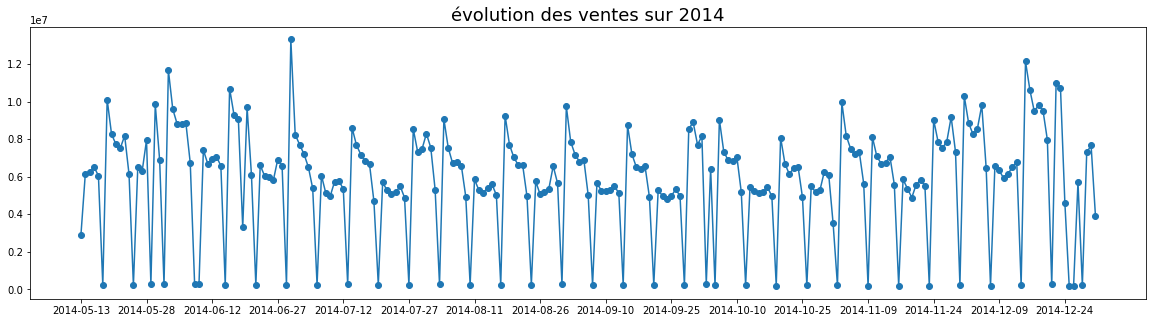

In [6]:
plt.figure(figsize = (20,5))
plt.title('évolution des ventes sur 2014', fontsize=18)
plt.plot_date(x = sales_2014_per_day['Date'].values, y = sales_2014_per_day['Sales'].values, xdate = True, ls = '-');
plt.xticks(np.arange(0,len(sales_2014_per_day.Date), 15))
plt.show()

Les ventes sur l'année 2014 au global présentent un schéma répétitif avec une poussée des ventes quotidiennes le week end

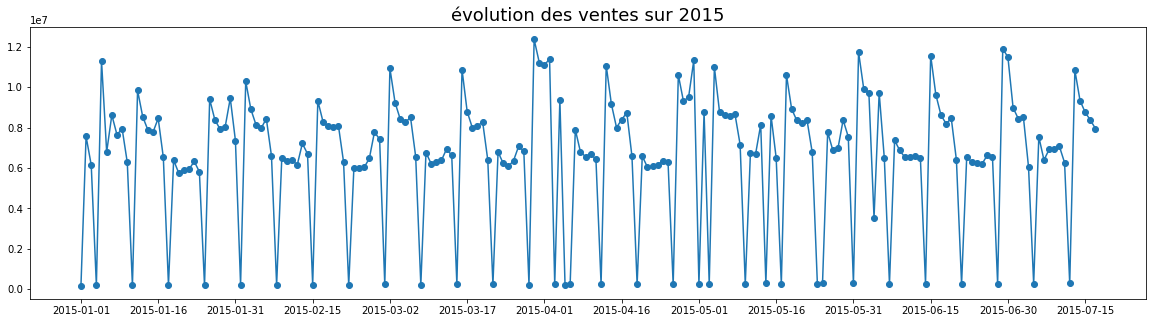

In [7]:
#Afficher les ventes par jour sur l'année 2015

sales_2015 = store_train[store_train['année'] == 2015]
sales_2015_per_day = sales_2015.groupby(['Date'] , as_index = False).agg({'Sales':'sum'})

plt.figure(figsize = (20,5))
plt.title('évolution des ventes sur 2015', fontsize=18)
plt.plot_date(x = sales_2015_per_day['Date'].values, y = sales_2015_per_day['Sales'].values, xdate = True, ls = '-');
plt.xticks(np.arange(0,len(sales_2015_per_day.Date), 15))
plt.show()

Les ventes sur l'année 2015 au global présentent un schéma répétitif avec aussi une poussée des ventes quotidiennes le week end
Nous allons également regarder la distribution des variables Sales et Customers à l'aide d'une boîte à moustache. 

Nous allons également regarder la distribution des variables Sales et Customers à l'aide d'une boîte à moustache. 

In [8]:
sales_per_day = store_train.groupby(['Date'] , as_index = False).agg({'Sales':'sum','Customers':'sum'})
sales_per_day.head()

,Date,Sales,Customers
0,2014-05-13,2896254,351766
1,2014-05-14,6141038,744235
2,2014-05-15,6252912,759575
3,2014-05-16,6515173,784919
4,2014-05-17,6052688,700008


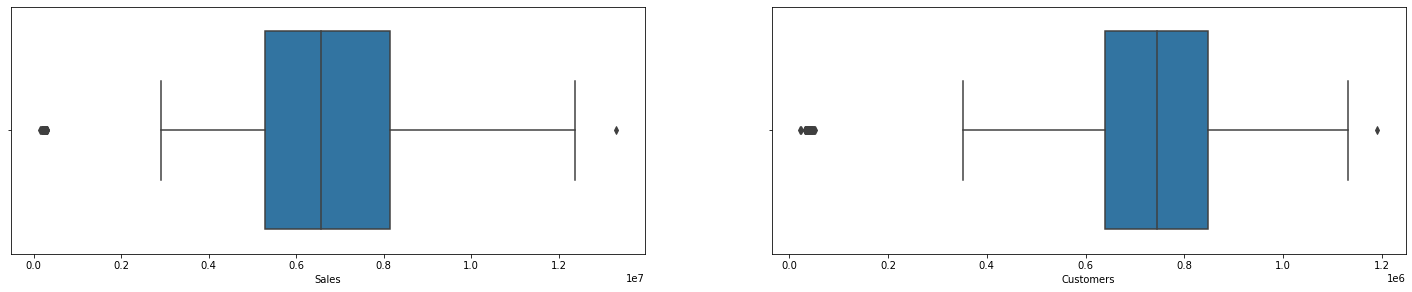

In [9]:
plt.figure(figsize = (25,10))
plt.subplot(221)
sns.boxplot(x = 'Sales', data = sales_per_day);
plt.subplot(222)
sns.boxplot(x = 'Customers', data = sales_per_day);

Les médianes de Sales et Customers se situentrespectivement autour de 6000000 et 7500000. Les deux présentent les mêmes profils :
très peu de valeurs au-delà de semblerait que nous ayons quelques magasins qui se démarquent avec des grosses ventes
et attirent plus de clients que les autres.

Observer et quantifier la relation linéaire entre les deux variables à l'aide du test de corrélation de pearson

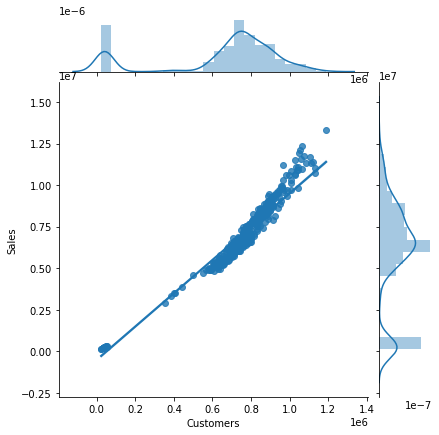

In [10]:
sns.jointplot("Customers", "Sales", data=sales_per_day, kind='reg')

On observe une relation linéaire entre les deux variables.  Nous remarquons également une distributions particulières
de Sales et Customers avec des valeurs basses puis un creux et de nouveau des valeurs. Cela fait référence à ce que  nous avons potentiellement un groupe atypique de magasins avec des chiffres plus faible que les autres. 

Nous allons donc quantifier cette relation par la corelation de pearson

In [11]:
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(sales_per_day['Sales'],sales_per_day['Customers']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,9.840831e-01
p-value,9.881313e-324


Comme nous y attendons, le nombre de clients par jours est fortement lié à la vente.

Maitenant nous allons nous interessé à la vente par jour de chaque magasin par plot_date ,pour confirmer cette intuition.

In [14]:
# Nous allons étudier les ventes sur l'années 2014

sales_2014 = store_train[store_train['année'] == 2014]
agg_store_2014 = sales_2014.groupby(['Store'], as_index = False).agg(
    {'Sales':'sum','Customers':'sum', 'Promo': 'sum','CompetitionDistance':'unique'})

agg_store_2014 = agg_store_2014.sort_values(by = 'Sales', ascending = False)

agg_store_2014

,Store,Sales,Customers,Promo,CompetitionDistance
261,262,4858073,801601,90,[1180.0]
561,562,4168662,721575,90,[1210.0]
816,817,4130224,586898,89,[140.0]
1113,1114,4071990,634396,89,[870.0]
250,251,3714273,482559,88,[340.0]
...,...,...,...,...,...
572,573,154950,12659,15,[1190.0]
1048,1049,149749,23964,15,[370.0]
878,879,145138,13353,15,[75860.0]
262,263,144768,14149,15,[1140.0]


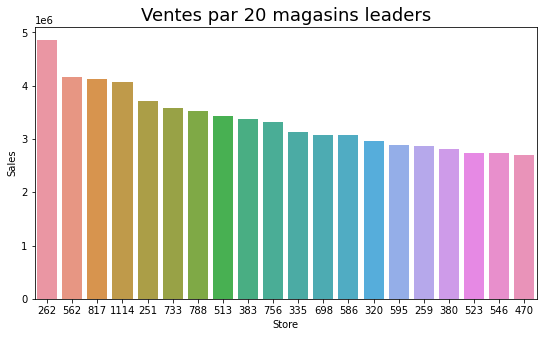

In [15]:
plt.figure(figsize = (9,5))
plt.title('Ventes par 20 magasins leaders',fontsize=18)

sns.barplot(x = 'Store', y = 'Sales', order = agg_store_2014['Store'].head(20).values, data = agg_store_2014.head(20));


Les magasins les plus vendeurs sont 262, 562,1114, et 817

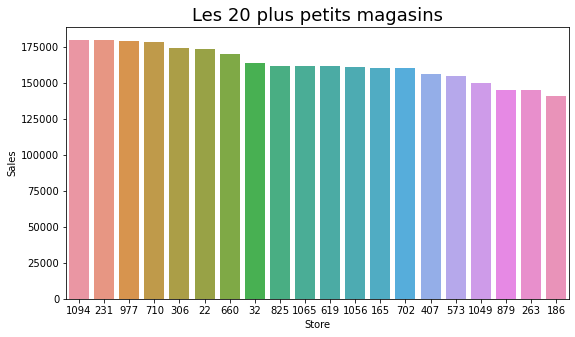

In [16]:
plt.figure(figsize = (9,5))
plt.title('Les 20 plus petits magasins',fontsize=18)

sns.barplot(x = 'Store', y = 'Sales', order = agg_store_2014['Store'].tail(20).values, data = agg_store_2014.tail(20));

De même les magasins les moins vendeurs sont  le 186, 263 et 879

In [17]:
# nous allons calculer le pourcentage de ventes des 20plus gros magasins et des 20 plus petits magasins
vente_lead = 0

for i in agg_store_2014["Store"].head(20).values:

    sale = agg_store_2014[agg_store_2014['Store']==i]['Sales'].sum()

    vente_lead += sale


vente_less = 0

for i in agg_store_2014["Store"].tail(20).values:

    sale = agg_store_2014[agg_store_2014['Store']==i]['Sales'].sum()

    vente_less += sale

In [18]:
print('Pourcentage des ventes des 20 plus gros magasins:',vente_lead/agg_store.Sales.sum()*100,'%')

print('Pourcentage des ventes des 20 plus petits magasins:',vente_less/agg_store.Sales.sum()*100,'%')

Pourcentage des ventes des 20 plus gros magasins: 4.99068737242772 %
Pourcentage des ventes des 20 plus petits magasins: 0.24190128518551476 %


Nous allons créer une variable cat_sales sur les 20 plus gros magasins L'objectif est de voir si dans les magasins il y a plutôt un grand nombre de petites ventes ou bien de grosses ventes. Cela nous permettra de déduire si le consommateur qui se rend dans le magasin privilégie plutôt de gros ou petits achats. Suivant l'un ou l'autre, le type de clientèle et donc les produits proposés ne sont pas les mêmes.

In [19]:
agg_store_lead = agg_store_2014.iloc[0:20,:]
agg_store_lead.shape

(20, 5)

In [20]:
borne_inf = int(round(agg_store_lead ['Sales'].min()))

borne_sup = int(round(agg_store_lead ['Sales'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

agg_store_lead['cat_Sales'] = pd.cut(
    agg_store_lead['Sales'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)


<ipython-input-20-8fea5ed1522c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_store_lead['cat_Sales'] = pd.cut(


In [21]:
agg_store_lead

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales
261,262,4858073,801601,90,[1180.0],"(4550434.0, 4858073.0]"
561,562,4168662,721575,90,[1210.0],"(3935156.0, 4242795.0]"
816,817,4130224,586898,89,[140.0],"(3935156.0, 4242795.0]"
1113,1114,4071990,634396,89,[870.0],"(3935156.0, 4242795.0]"
250,251,3714273,482559,88,[340.0],"(3627517.0, 3935156.0]"
732,733,3571591,809539,90,[860.0],"(3319878.0, 3627517.0]"
787,788,3530585,334573,89,[1530.0],"(3319878.0, 3627517.0]"
512,513,3428680,395118,89,[400.0],"(3319878.0, 3627517.0]"
382,383,3365708,423603,88,[350.0],"(3319878.0, 3627517.0]"
755,756,3323845,469443,88,[50.0],"(3319878.0, 3627517.0]"


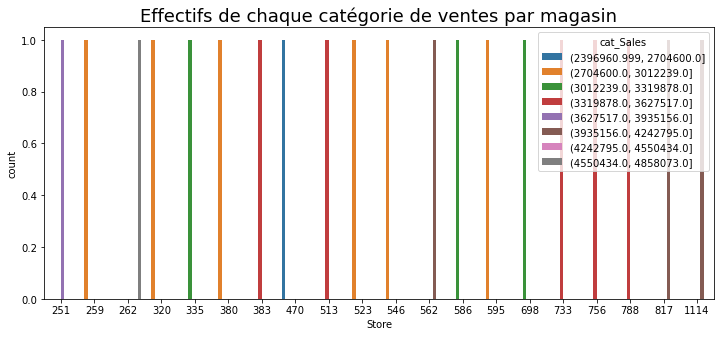

In [22]:
plt.figure(figsize = (12,5))

plt.title('Effectifs de chaque catégorie de ventes par magasin',fontsize=18)
sns.countplot(x = 'Store', hue = 'cat_Sales', data = agg_store_lead);

In [ ]:
Parmis les magasins qui font le plus de ventes, 3 d'entre elles se distinguent;
251 : affiche des ventes entre 8404514 et 8965342
259: affiche des ventes entre 7843686 et 8404514
262 : 7282858 et 7843686.
    
on y retrouve le leader 262.

Nous allons regarder la fréquentation des magasins. Pour visualiser rapidement quels sont les
magasins qui attirent le plus de clients 

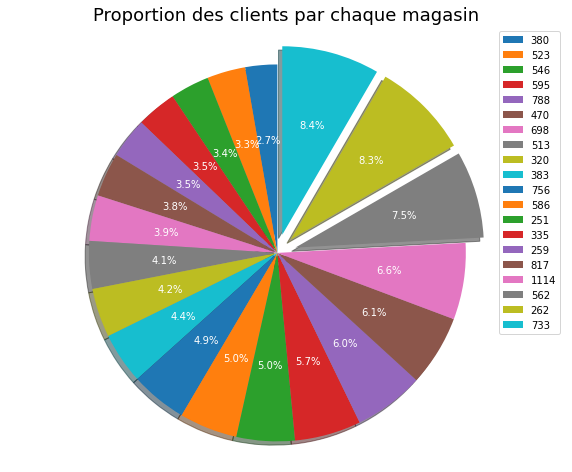

In [23]:
agg_store_lead = agg_store_lead.sort_values(by = 'Customers', ascending = True)


plt.figure(figsize=(10,8))

explode = np.zeros(17).tolist()

explode.extend([0.1,0.1,0.1])



plt.pie(agg_store_lead['Customers'],labels=agg_store_lead['Store'],explode = explode, autopct='%1.1f%%',

        shadow=True, startangle=90,textprops=dict(color="w"))

plt.axis('equal')

plt.title('Proportion des clients par chaque magasin',fontsize=18)

plt.legend(loc="best");

In [ ]:
Les magasins de tête le 262, 733 et 562 attirent à eux 3,
23% des clients sur 2014

In [25]:
agg_store_less = agg_store_2014.tail(20)
agg_store_less

,Store,Sales,Customers,Promo,CompetitionDistance
1093,1094,179792,14894,15,[2380.0]
230,231,179774,15026,15,[3840.0]
976,977,179047,19316,15,[520.0]
709,710,178245,14571,15,[1500.0]
305,306,173989,18652,15,[5100.0]
21,22,173627,19492,15,[1040.0]
659,660,169995,18873,15,[1200.0]
31,32,163449,18960,15,[2910.0]
824,825,161983,19759,15,[380.0]
1064,1065,161685,18665,15,[1290.0]


In [26]:
borne_inf = int(round(agg_store_less['Customers'].min()))

borne_sup = int(round(agg_store_less['Customers'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

agg_store_less['cat_Customers'] = pd.cut(agg_store_less['Customers'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)

<ipython-input-26-a2b6175b8272>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_store_less['cat_Customers'] = pd.cut(agg_store_less['Customers'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)


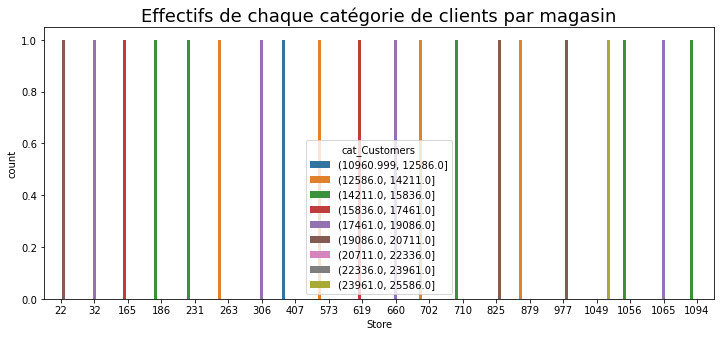

In [27]:
plt.figure(figsize = (12,5))

plt.title('Effectifs de chaque catégorie de clients par magasin',fontsize=18)

sns.countplot(x = 'Store', hue = 'cat_Customers', data = agg_store_less);

In [30]:
agg_StoreType = sales_2014.groupby(['StoreType'], as_index = False).sum()

agg_StoreType['performance'] = agg_StoreType['Sales']/agg_StoreType['Customers']


In [31]:
agg_StoreType

,StoreType,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem,performance
0,1,58046848,81188,571429750.0,797203.0,207949182.0,43768,963104.0,208084195.0,28308,...,103456,46998,85,25880,52436386960,208360384,887729,1682389,257662,8.725064
1,2,2123229,2372,4085410.0,29039.0,7576090.0,980,24196.0,7581187.0,331,...,3769,1456,162,872,1933256350,7590766,32587,61531,11275,5.100760
2,3,15988744,25766,91602840.0,197967.0,52942510.0,12366,258504.0,52982030.0,10565,...,26343,12040,23,6622,13397663007,53054802,227018,427182,65380,8.564009
3,4,29098164,71794,408163340.0,441728.0,110010478.0,29061,647943.0,110056958.0,19532,...,54718,24778,34,13720,27811731936,110202052,465221,892492,136065,11.231741


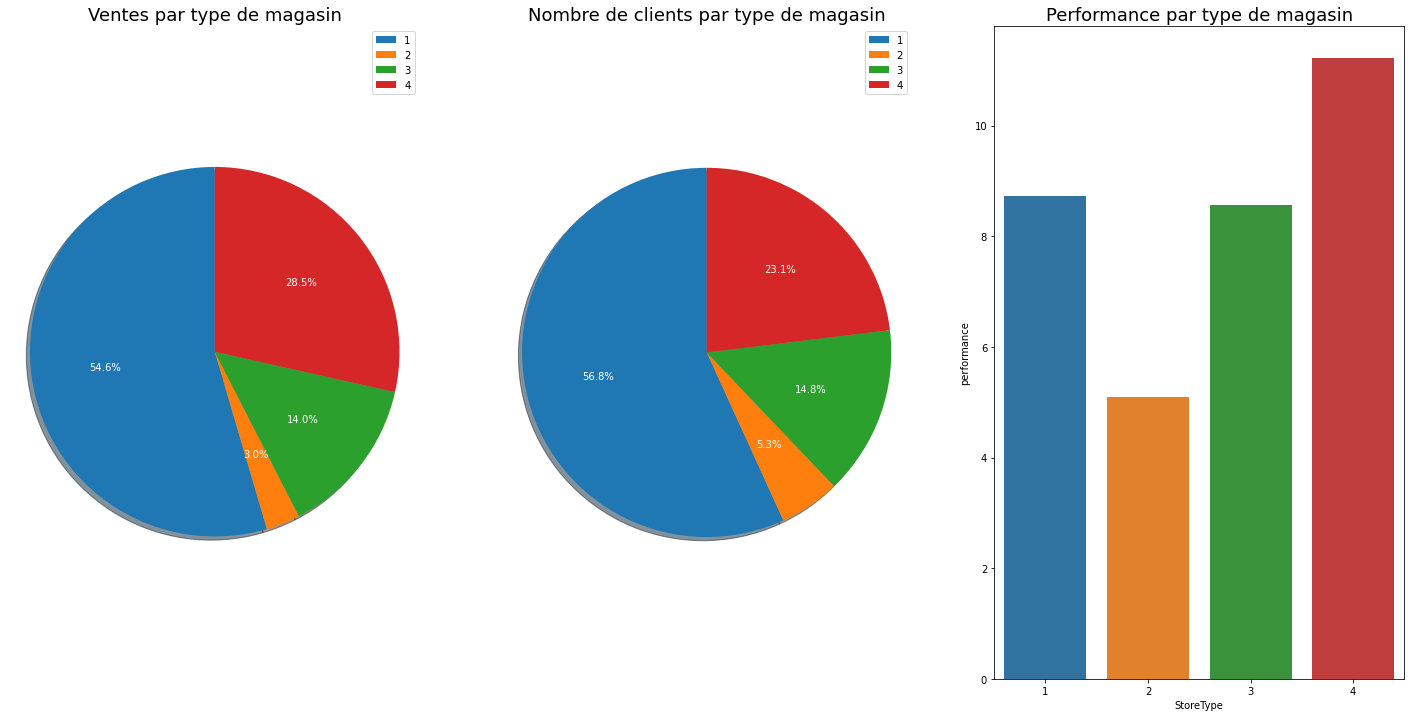

In [32]:
fig1, ax1 = plt.subplots(1,3,figsize=(25,12))

ax1[0].pie(agg_StoreType['Sales'].values,labels=agg_StoreType['StoreType'].values, autopct='%1.1f%%',

            shadow=True, startangle=90,textprops=dict(color="w"))

ax1[0].axis('equal')

ax1[0].set_title('Ventes par type de magasin',fontsize=18)

ax1[0].legend(loc="best");


ax1[1].pie(agg_StoreType['Customers'].values,labels=agg_StoreType['StoreType'].values, autopct='%1.1f%%',

            shadow=True, startangle=90,textprops=dict(color="w"))

ax1[1].axis('equal')

ax1[1].set_title('Nombre de clients par type de magasin',fontsize=18)

ax1[1].legend(loc="best");



ax1[2] = sns.barplot(x = 'StoreType', y = 'performance', data = agg_StoreType)

ax1[2].set_title('Performance par type de magasin',fontsize=18);


In [38]:
agg_store_lead['performance'] = agg_store_lead['Sales']/agg_store_lead['Customers']

agg_store_lead = agg_store_lead.sort_values(by= 'performance', ascending = True)

In [40]:
agg_store_lead.head()

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales,performance
732,733,3571591,809539,90,[860.0],"(3319878.0, 3627517.0]",4.411883
258,259,2866962,580788,90,[210.0],"(2704600.0, 3012239.0]",4.936331
334,335,3136181,549950,90,[90.0],"(3012239.0, 3319878.0]",5.702666
561,562,4168662,721575,90,[1210.0],"(3935156.0, 4242795.0]",5.777171
261,262,4858073,801601,90,[1180.0],"(4550434.0, 4858073.0]",6.060463


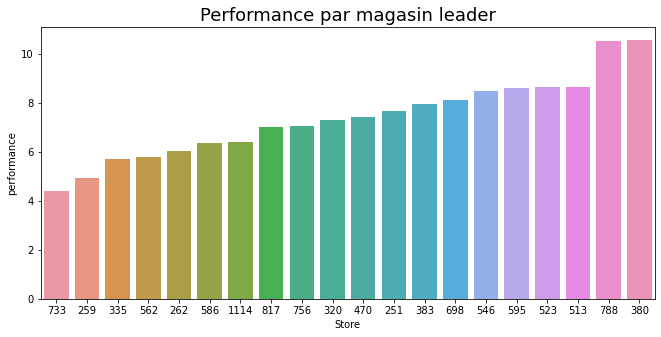

In [47]:
agg_store_lead['performance'] = agg_store_lead['Sales']/agg_store['Customers']

plt.figure(figsize = (11,5))

plt.title('Performance par magasin leader',fontsize=18)

sns.barplot(x = 'Store', y = 'performance', order = agg_store_lead['Store'], data = agg_store_lead);